In [26]:
import regex
import re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import ipywidgets as widgets
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [27]:
# Define helper functions
def startsWithDateAndTime(s):
    # Adjust pattern for various date and time formats
    pattern = r'^\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}\u202f[apm]{2} -'
    result = re.match(pattern, s)
    return bool(result)

def getDataPoint(line):
    # Split only once on ' - ' to handle cases where the message might contain ' - '
    splitLine = line.split(' - ', 1)
    
    if len(splitLine) < 2:
        return None, None, None, line  # Return the whole line as message if split is not possible
    
    dateTime = splitLine[0]  # Date and time
    message_part = splitLine[1]  # Message content

    try:
        date, time = dateTime.split(', ')  # Split date and time
    except ValueError:
        return None, None, None, message_part  # Handle parsing errors

    # Identify the author and message
    if ': ' in message_part:  # Check if the message contains an author
        author, message = message_part.split(': ', 1)  # Split author and message
    else:
        author = None
        message = message_part
    
    # Handle cases where message content might have leading/trailing whitespace or special characters
    return date.strip() if date else None, time.strip() if time else None, author.strip() if author else None, message.strip() if message else None


def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(emoji.is_emoji(char) for char in word):
            emoji_list.append(word)
    return emoji_list

FileUpload(value={}, accept='.txt', description='Upload')

,Date,Time,Author,Message
44,2023-06-13,2:07 pm,+91 84454 48877,Guys since yesterday I am facing this problem ...
45,2023-06-13,2:07 pm,+91 84454 48877,Is shows something like this
47,2023-06-13,2:16 pm,+91 84454 48877,Okey bro
95,2023-06-14,4:16 pm,+91 63053 56890,<Media omitted>
97,2023-06-14,4:17 pm,+91 60005 88432,B


*****Group chat****
Messages: 8497
Media: 455
Emojis: 2046
Links: 683
(😂: 302) , (🥲: 119) , (🤣: 85) , (💀: 81) , (😅: 72) , (💯: 53) , (🙏: 43) , (🙂: 38) , (😁: 36) , (👍: 33) , (✨: 32) , (🫠: 29) , (😶‍🌫️: 28) , (☠️: 27) , (😊: 25) , (🤔: 24) , (🌟: 23) , (😭: 23) , (🥹: 22) , (🔥: 22) , (📌: 21) , (🔗: 21) , (📣: 20) , (🤍: 20) , (📢: 19) , (🤗: 19) , (✅: 19) , (ℹ️: 19) , (🚀: 18) , (🔻: 18) , (🌚: 18) , (👉: 18) , (❓: 16) , (🥳: 15) , (👍🏻: 14) , (🎉: 14) , (➕: 14) , (🫡: 13) , (🙄: 13) , (🌝: 12) , (😜: 11) , (🤝: 11) , (😔: 11) , (🎓: 10) , (💙: 10) , (🎊: 10) , (🤭: 9) , (🗿: 9) , (🤡: 9) , (❤️: 9) , (🙏🏻: 8) , (🔜: 8) , (🧐: 8) , (⚠️: 8) , (😕: 7) , (😎: 7) , (👇: 7) , (💼: 7) , (👇🏻: 7) , (🤧: 7) , (🌐: 7) , (😀: 7) , (📲: 6) , (📧: 6) , (🏆: 6) , (🔸: 6) , (🤓: 6) , (🫨: 6) , (👏🏻: 6) , (🥺: 5) , (😐: 5) , (🥱: 5) , (🤨: 5) , (📝: 5) , (💡: 5) , (🙅: 5) , (🙃: 5) , (😶: 5) , (☺: 5) , (😴: 5) , (🫶: 5) , (👋: 5) , (💐: 5) , (😇: 4) , (💩: 4) , (🖇️: 4) , (😃: 4) , (😌: 4) , (😆: 4) , (😒: 4) , (🙋: 4) , (▪: 4) , (😄: 4) , (🫤: 4) , (😖: 4) , (❌: 4) , (💌: 4)

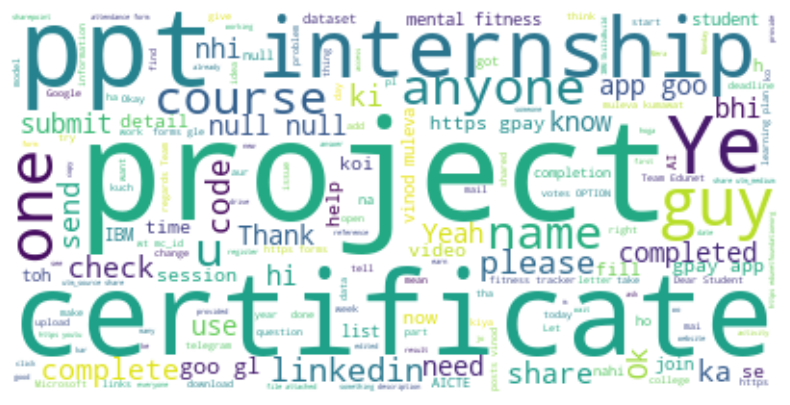

Statistics of +91 84454 48877 -
Messages Sent: 3
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 63053 56890 -
Messages Sent: 16
Media Messages Sent: 6
Emojis Sent: 1
Links Sent: 1

Statistics of +91 60005 88432 -
Messages Sent: 47
Media Messages Sent: 0
Emojis Sent: 8
Links Sent: 2

Statistics of +91 94412 56200 -
Messages Sent: 7
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 62647 13299 -
Messages Sent: 158
Media Messages Sent: 31
Emojis Sent: 113
Links Sent: 4

Statistics of +91 92596 20656 -
Messages Sent: 45
Media Messages Sent: 1
Emojis Sent: 3
Links Sent: 1

Statistics of +91 94412 12344 -
Messages Sent: 2
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 72009 25000 -
Messages Sent: 130
Media Messages Sent: 4
Emojis Sent: 19
Links Sent: 6

Statistics of +91 86683 22731 -
Messages Sent: 6
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 77421 87198 -
Messages Sent: 88
Media Messages Sent: 

Media Messages Sent: 1
Emojis Sent: 5
Links Sent: 2

Statistics of +91 88788 49583 -
Messages Sent: 19
Media Messages Sent: 2
Emojis Sent: 2
Links Sent: 1

Statistics of +91 87008 36559 -
Messages Sent: 1
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 92050 05939 -
Messages Sent: 2
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 82173 64971 -
Messages Sent: 28
Media Messages Sent: 0
Emojis Sent: 4
Links Sent: 0

Statistics of +91 86396 09097 -
Messages Sent: 11
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 1

Statistics of +91 81153 61719 -
Messages Sent: 1
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 80118 01337 -
Messages Sent: 61
Media Messages Sent: 12
Emojis Sent: 6
Links Sent: 1

Statistics of +91 94917 70217 -
Messages Sent: 19
Media Messages Sent: 2
Emojis Sent: 1
Links Sent: 13

Statistics of +91 99579 39994 -
Messages Sent: 7
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 674 

Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 84457 60646 -
Messages Sent: 13
Media Messages Sent: 0
Emojis Sent: 4
Links Sent: 0

Statistics of +91 87009 53364 -
Messages Sent: 2
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 89772 92324 -
Messages Sent: 44
Media Messages Sent: 0
Emojis Sent: 1
Links Sent: 0

Statistics of +91 73385 33930 -
Messages Sent: 16
Media Messages Sent: 3
Emojis Sent: 3
Links Sent: 0

Statistics of +91 85309 25702 -
Messages Sent: 50
Media Messages Sent: 2
Emojis Sent: 7
Links Sent: 0

Statistics of +91 87002 24729 -
Messages Sent: 18
Media Messages Sent: 0
Emojis Sent: 4
Links Sent: 0

Statistics of +91 70215 78257 -
Messages Sent: 36
Media Messages Sent: 0
Emojis Sent: 4
Links Sent: 0

Statistics of +91 99837 45350 -
Messages Sent: 10
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 74476 42517 -
Messages Sent: 14
Media Messages Sent: 0
Emojis Sent: 8
Links Sent: 0

Statistics of +91 739

Statistics of +91 93105 81797 -
Messages Sent: 7
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 1

Statistics of +91 90745 22048 -
Messages Sent: 8
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 90765 52502 -
Messages Sent: 5
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 85559 95671 -
Messages Sent: 2
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 98004 68850 -
Messages Sent: 6
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 2

Statistics of +91 72910 04805 -
Messages Sent: 3
Media Messages Sent: 0
Emojis Sent: 4
Links Sent: 0

Statistics of +91 70190 00312 -
Messages Sent: 3
Media Messages Sent: 0
Emojis Sent: 4
Links Sent: 0

Statistics of +91 95949 51084 -
Messages Sent: 16
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 1

Statistics of +91 83700 33444 -
Messages Sent: 5
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 93463 32759 -
Messages Sent: 2
Media Messages Sent: 0
Emojis Se

Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 96076 66171 -
Messages Sent: 7
Media Messages Sent: 6
Emojis Sent: 0
Links Sent: 0

Statistics of +91 85308 23378 -
Messages Sent: 1
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 76391 31279 -
Messages Sent: 2
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 78426 34202 -
Messages Sent: 1
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 63727 40463 -
Messages Sent: 7
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 82094 94572 -
Messages Sent: 1
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 97303 94533 -
Messages Sent: 2
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 86673 13863 -
Messages Sent: 1
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +91 83097 26505 -
Messages Sent: 2
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 1

Statistics of +91 97050 70852

In [28]:
# Create an upload button widget
upload_button = widgets.FileUpload(accept='.txt', multiple=False)
display(upload_button)
def handle_upload(change):
    # Access the uploaded file
    uploaded_file = list(upload_button.value.values())[0]
    content = uploaded_file['content'].decode('utf-8')
    
    data = []  # List to keep track of data so it can be used by a Pandas dataframe
    
    messageBuffer = [] 
    date, time, author = None, None, None
    lines = content.split('\n')
    for line in lines:
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                data.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
    if len(messageBuffer) > 0: 
        data.append([date, time, author, ' '.join(messageBuffer)])
    
    # Create a DataFrame
    df = pd.DataFrame(data, columns=['Date', 'Time', 'Author', 'Message'])
    df["Date"] = pd.to_datetime(df["Date"])
    df=df.dropna(subset=['Author'])
    display(df.head())
    
    # Calculate statistics
    total_messages = df.shape[0]
    media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
    df["emoji"] = df["Message"].apply(split_count)
    emojis = sum(df['emoji'].str.len())
    URLPATTERN = r'(https?://\S+)'
    df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
    links = np.sum(df.urlcount)

    print("*****Group chat****")
    print("Messages:", total_messages)
    print("Media:", media_messages)
    print("Emojis:", emojis)
    print("Links:", links)
    
    media_messages_df = df[df['Message'] == '<Media omitted>']
    messages_df = df.drop(media_messages_df.index)
    total_emojis_list = list([a for b in messages_df.emoji for a in b])
    emoji_dict = dict(Counter(total_emojis_list))
    emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
    print(" , ".join(f"({emoji}: {count})" for emoji, count in emoji_dict))
    
    text = " ".join(review for review in df['Message'])
    print ("There are {} words in all the messages.".format(len(text)))
    additional_stopwords = {"joined", "using","bro","will","hai","group","bhai","pm","invite","link","<Media omitted>","Media","omitted","message", "kya","deleted"}
    stopwords = set(STOPWORDS).union(additional_stopwords)
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    # Display the generated image:
    # the matplotlib way:
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
   
    authors = df['Author'].unique()

    for author in authors:
        # Filtering out messages of a particular user
        req_df = df[df["Author"] == author]
        print(f'Statistics of {author} -')
        print('Messages Sent:', req_df.shape[0])
        media = df[(df['Message'] == '<Media omitted>') & (df['Author'] == author)].shape[0]
        print('Media Messages Sent:', media)
        emojis = sum(req_df['emoji'].str.len())
        print('Emojis Sent:', emojis)
        links = sum(req_df["urlcount"])
        print('Links Sent:', links)
        print()

# Link the handle_upload function to the upload button
upload_button.observe(handle_upload, names='value')